In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt 
import fiona
import shapely
import numpy as np
import random
import math

ModuleNotFoundError: No module named 'geopandas'

In [2]:
fp = "G_MP14_RAIL_LI.shp"

data = gp.read_file(fp)

In [56]:
#Enable fiona driver
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Read file
path = '../G_MP14_RAIL_LI.kml'
df = gp.read_file(path, driver='KML')

# Write file
with fiona.drivers():
    # Might throw a WARNING - CPLE_NotSupported in b'dataset sample_out.kml does not support layer creation option ENCODING'
    df.to_file('sample_out.kml', driver='KML')
    
# Drop Z dimension of polygons that occurs often in kml 
import shapely
df.geometry = df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y, z: (x, y), polygon))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FionaDeprecationWarning: Use fiona.Env() instead.
  if __name__ == '__main__':


In [57]:
df['geometry']

0       MULTILINESTRING ((103.85210 1.29351, 103.85209...
1       MULTILINESTRING ((103.85210 1.29351, 103.85209...
2       MULTILINESTRING ((103.84537 1.29905, 103.84537...
3       MULTILINESTRING ((103.84533 1.29892, 103.84533...
4       MULTILINESTRING ((103.83833 1.30039, 103.83802...
                              ...                        
1392    MULTILINESTRING ((103.83446 1.39428, 103.83446...
1393    MULTILINESTRING ((103.83441 1.39427, 103.83441...
1394    MULTILINESTRING ((103.87117 1.28550, 103.87117...
1395    MULTILINESTRING ((103.93288 1.33675, 103.93300...
1396    MULTILINESTRING ((103.93287 1.33661, 103.93291...
Name: geometry, Length: 1397, dtype: geometry

In [58]:
data

,OBJECTID,OID_1,GRND_LEVEL,TYPE,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,geometry
0,1,0,UNDERGROUND,MRT,43215EF9C877C56F,2014-06-23,29859.1013,30997.7625,826.574555,"LINESTRING (29513.376 31211.449, 29513.618 312..."
1,2,0,UNDERGROUND,MRT,6105B200FED9F6AB,2014-06-23,29847.8403,30983.1468,815.626905,"LINESTRING (29508.584 31196.830, 29508.817 311..."
2,3,0,UNDERGROUND,MRT,11D377899E972359,2014-06-23,29043.1323,31328.9357,610.083840,"LINESTRING (28744.000 31388.314, 28820.801 313..."
3,4,0,UNDERGROUND,MRT,8743FDEC51A13827,2014-06-23,29039.5927,31316.4599,608.693508,"LINESTRING (28740.927 31374.606, 28809.279 313..."
4,5,0,UNDERGROUND,MRT,8D1604C6958EBC87,2014-06-23,28136.7387,31429.3362,854.419016,"LINESTRING (27871.646 31719.024, 27871.921 317..."
...,...,...,...,...,...,...,...,...,...,...
1394,1395,0,ABOVEGROUND,MRT,C4A81D72C19F0FB1,2014-06-23,28146.8723,41785.7053,47.436025,"LINESTRING (28166.957 41773.089, 28166.118 417..."
1395,1396,0,ABOVEGROUND,MRT,F8D322A23246EFF5,2014-06-23,28142.1483,41783.5963,49.979993,"LINESTRING (28163.310 41770.304, 28162.141 417..."
1396,1397,0,UNDERGROUND,MRT,4D22380084C39AFD,2014-06-23,32235.2111,29744.2289,95.977346,"LINESTRING (32212.536 29769.499, 32235.719 297..."
1397,1398,0,UNDERGROUND,MRT,56222C78A49CB84D,2014-06-23,39359.8106,35450.3667,561.372407,"LINESTRING (39638.135 35484.169, 39632.161 354..."


In [59]:
coba_pandas = pd.DataFrame(df.drop('geometry',axis=1))

In [60]:
coba_pandas['Description'][0]

'<html xmlns:fo="http://www.w3.org/1999/XSL/Format" xmlns:msxsl="urn:schemas-microsoft-com:xslt"> <head> <META http-equiv="Content-Type" content="text/html"> <meta http-equiv="content-type" content="text/html; charset=UTF-8"> </head> <body style="margin:0px 0px 0px 0px;overflow:auto;background:#FFFFFF;"> <table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-collapse:collapse;padding:3px 3px 3px 3px"> <tr style="text-align:center;font-weight:bold;background:#9CBCE2"> <td>UNDERGROUND</td> </tr> <tr> <td> <table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-spacing:0px; padding:3px 3px 3px 3px"> <tr> <td>SHAPE</td> <td>Polyline</td> </tr> <tr bgcolor="#D4E4F3"> <td>Object ID</td> <td>&lt;Null&gt;</td> </tr> <tr> <td>Ground Level</td> <td>UNDERGROUND</td> </tr> <tr bgcolor="#D4E4F3"> <td>Type</td> <td>MRT</td> </tr> <tr> <td>INC_CRC</td> <td>43215EF9C877C56F</td> </tr> <tr bgcolor="#D4E4F3"> <td>FMEL_UPD_D</

In [61]:
a = coba_pandas['Description'].str.extract('(?:INC_CRC</td>\s<td>)(.*?)(?:</td>)')

a[0].value_counts()

35B20EAC09D3096B    2
C50B2F67EC1D2A25    1
C69A2C944C62013C    1
7A621ACBEB21AED2    1
90C7DAB0765EAAED    1
                   ..
F7356CE8B4A39B93    1
E70A537943BD0021    1
9332992882DF99DB    1
2116A17E7B2EFC99    1
754F02E27371722D    1
Name: 0, Length: 1396, dtype: int64

In [62]:
df['INC_CRC'] = coba_pandas['Description'].str.extract('(?:INC_CRC</td>\s<td>)(.*?)(?:</td>)')
# a.rename({0 : 'INC_CRC'},axis=1, inplace = True)
df

,Name,Description,geometry,INC_CRC
0,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.85210 1.29351, 103.85209...",43215EF9C877C56F
1,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.85210 1.29351, 103.85209...",6105B200FED9F6AB
2,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.84537 1.29905, 103.84537...",11D377899E972359
3,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.84533 1.29892, 103.84533...",8743FDEC51A13827
4,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83833 1.30039, 103.83802...",8D1604C6958EBC87
...,...,...,...,...
1392,ABOVEGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83446 1.39428, 103.83446...",C4A81D72C19F0FB1
1393,ABOVEGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83441 1.39427, 103.83441...",F8D322A23246EFF5
1394,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.87117 1.28550, 103.87117...",4D22380084C39AFD
1395,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.93288 1.33675, 103.93300...",56222C78A49CB84D


In [ ]:
# for i in range(len(df['geometry'][0][0].xy[0])):
#     print(i)

# sorted(df['geometry'][0][0].xy[0], key = lambda k: random.random())
len(df['geometry'][9][0].xy[0])
# b = math.ceil(len(a)/5)
# for i in range(b):
#     print(i)
# # random.sample(a, len(a)/5)

In [64]:

x = []
y = []
# for i in range(len(df)):
#     x.append(df['geometry'][i][0].xy[0])
#     y.append(df['geometry'][i][0].xy[0])
for i in range(len(df)):
    x1 = []
    y1 = []

    rand_x = sorted(df['geometry'][i][0].xy[0], key = lambda k: 1) 
    rand_y = sorted(df['geometry'][i][0].xy[1], key = lambda k: 1) 
    sampled = math.ceil(len(rand_x)/5)
    
    for j in range(sampled):
        x1.append(rand_x[j])
        y1.append(rand_y[j])
    
    x.append(x1)
    y.append(y1)
    


    


# x.append([i for i in df['geometry'].apply(lambda x: x_lat(x))])


# x = [i for i in data['geometry'][0].xy[0]]
# y = [i for i in data['geometry'][0].xy[1]]

In [67]:
for j in range(0,12,3):
    print(j)

0
3
6
9


In [72]:
from tqdm import tqdm

for i in tqdm(range(0,10)):
    print(i)

100%|██████████| 10/10 [00:00<00:00, 28886.39it/s]

0
1
2
3
4
5
6
7
8
9


In [74]:

x = []
y = []
# for i in range(len(df)):
#     x.append(df['geometry'][i][0].xy[0])
#     y.append(df['geometry'][i][0].xy[0])
for i in tqdm(range(len(df))):
    x1 = []
    y1 = []
    a = df['geometry'][i][0].xy[0]
    for j in range(0,len(a),4):
        x1.append(df['geometry'][i][0].xy[0][j])
        y1.append(df['geometry'][i][0].xy[1][j])
    
    x.append(x1)
    y.append(y1)
    


    


# x.append([i for i in df['geometry'].apply(lambda x: x_lat(x))])


# x = [i for i in data['geometry'][0].xy[0]]
# y = [i for i in data['geometry'][0].xy[1]]


100%|██████████| 1397/1397 [53:02<00:00,  2.28s/it]


In [13]:
len(x[0])

16

In [75]:
df['longitude'] = pd.DataFrame({'longitude' : x})
df['latitude'] = pd.DataFrame({'latitude' : y})

df

,Name,Description,geometry,INC_CRC,longitude,latitude
0,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.85210 1.29351, 103.85209...",43215EF9C877C56F,"[103.8520984049067, 103.8519607703489, 103.851...","[1.293508360354313, 1.293715934801187, 1.29398..."
1,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.85210 1.29351, 103.85209...",6105B200FED9F6AB,"[103.8520984049067, 103.8519607703489, 103.851...","[1.293508360354313, 1.293715934801187, 1.29395..."
2,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.84537 1.29905, 103.84537...",11D377899E972359,"[103.8453743243226, 103.8451096556791, 103.844...","[1.299048444384662, 1.299130764540524, 1.29921..."
3,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.84533 1.29892, 103.84533...",8743FDEC51A13827,"[103.8453309473499, 103.8450850250478, 103.844...","[1.298915320286446, 1.298995948283519, 1.29908..."
4,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83833 1.30039, 103.83802...",8D1604C6958EBC87,"[103.8383269207308, 103.8374625314519, 103.837...","[1.300389738056455, 1.300618306978287, 1.30067..."
...,...,...,...,...,...,...
1392,ABOVEGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83446 1.39428, 103.83446...",C4A81D72C19F0FB1,"[103.834457871498, 103.8345069204476, 103.8345...","[1.394283684722534, 1.394252675862177, 1.39421..."
1393,ABOVEGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83441 1.39427, 103.83441...",F8D322A23246EFF5,"[103.8344057430951, 103.834455958401, 103.8345...","[1.394270729731281, 1.394238982910337, 1.39420..."
1394,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.87117 1.28550, 103.87117...",4D22380084C39AFD,"[103.8711698894848, 103.8711698894848]","[1.285498998667392, 1.285498998667392]"
1395,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.93288 1.33675, 103.93300...",56222C78A49CB84D,"[103.9328770921441, 103.9331650854853, 103.933...","[1.336752146381437, 1.336741993088136, 1.33673..."


In [76]:
df = df.merge(data[['GRND_LEVEL','TYPE','SHAPE_Leng','INC_CRC']],on = 'INC_CRC', how='left')

In [77]:
df

,Name,Description,geometry,INC_CRC,longitude,latitude,GRND_LEVEL,TYPE,SHAPE_Leng
0,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.85210 1.29351, 103.85209...",43215EF9C877C56F,"[103.8520984049067, 103.8519607703489, 103.851...","[1.293508360354313, 1.293715934801187, 1.29398...",UNDERGROUND,MRT,826.574555
1,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.85210 1.29351, 103.85209...",6105B200FED9F6AB,"[103.8520984049067, 103.8519607703489, 103.851...","[1.293508360354313, 1.293715934801187, 1.29395...",UNDERGROUND,MRT,815.626905
2,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.84537 1.29905, 103.84537...",11D377899E972359,"[103.8453743243226, 103.8451096556791, 103.844...","[1.299048444384662, 1.299130764540524, 1.29921...",UNDERGROUND,MRT,610.083840
3,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.84533 1.29892, 103.84533...",8743FDEC51A13827,"[103.8453309473499, 103.8450850250478, 103.844...","[1.298915320286446, 1.298995948283519, 1.29908...",UNDERGROUND,MRT,608.693508
4,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83833 1.30039, 103.83802...",8D1604C6958EBC87,"[103.8383269207308, 103.8374625314519, 103.837...","[1.300389738056455, 1.300618306978287, 1.30067...",UNDERGROUND,MRT,854.419016
...,...,...,...,...,...,...,...,...,...
1394,ABOVEGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83446 1.39428, 103.83446...",C4A81D72C19F0FB1,"[103.834457871498, 103.8345069204476, 103.8345...","[1.394283684722534, 1.394252675862177, 1.39421...",ABOVEGROUND,MRT,47.436025
1395,ABOVEGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.83441 1.39427, 103.83441...",F8D322A23246EFF5,"[103.8344057430951, 103.834455958401, 103.8345...","[1.394270729731281, 1.394238982910337, 1.39420...",ABOVEGROUND,MRT,49.979993
1396,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.87117 1.28550, 103.87117...",4D22380084C39AFD,"[103.8711698894848, 103.8711698894848]","[1.285498998667392, 1.285498998667392]",UNDERGROUND,MRT,95.977346
1397,UNDERGROUND,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTILINESTRING ((103.93288 1.33675, 103.93300...",56222C78A49CB84D,"[103.9328770921441, 103.9331650854853, 103.933...","[1.336752146381437, 1.336741993088136, 1.33673...",UNDERGROUND,MRT,561.372407


In [78]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, df[lst_cols[0]].str.len())
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]
    
    

df_exploded = explode(df, lst_cols=list(['longitude','latitude']))

In [79]:
df_exploded.drop('Description',axis=1,inplace=True)

In [80]:
df_exploded.drop('geometry',axis=1,inplace=True)

In [81]:
df_exploded

,Name,INC_CRC,longitude,latitude,GRND_LEVEL,TYPE,SHAPE_Leng
0,UNDERGROUND,43215EF9C877C56F,103.852098,1.293508,UNDERGROUND,MRT,826.574555
1,UNDERGROUND,43215EF9C877C56F,103.851961,1.293716,UNDERGROUND,MRT,826.574555
2,UNDERGROUND,43215EF9C877C56F,103.851784,1.293983,UNDERGROUND,MRT,826.574555
3,UNDERGROUND,43215EF9C877C56F,103.850680,1.295660,UNDERGROUND,MRT,826.574555
4,UNDERGROUND,43215EF9C877C56F,103.850475,1.295970,UNDERGROUND,MRT,826.574555
...,...,...,...,...,...,...,...
98897,UNDERGROUND,B342157470B5AD4A,103.937368,1.336978,UNDERGROUND,MRT,571.576093
98898,UNDERGROUND,B342157470B5AD4A,103.937497,1.336994,UNDERGROUND,MRT,571.576093
98899,UNDERGROUND,B342157470B5AD4A,103.937627,1.337014,UNDERGROUND,MRT,571.576093
98900,UNDERGROUND,B342157470B5AD4A,103.937755,1.337038,UNDERGROUND,MRT,571.576093


In [82]:
df_exploded.to_excel('mrt_rail_datapoints_exploded_v4.xlsx',index=False)

In [392]:
df.to_excel('mrt_rail_datapoints.xlsx',index=False)

In [331]:
for i in range(len(df)):
    try:
        x = df['geometry'][i][0].xy
    except:
        print(i)

In [298]:
df['geometry'][0][0].xy

(array('d', [103.8520984049067, 103.8520940515158, 103.8520736009086, 103.8520106631816, 103.8519607703489, 103.851919972457, 103.8518637422714, 103.8518269725026, 103.8517842571524, 103.8517185087924, 103.8507329621187, 103.8507137909966, 103.850679602666, 103.8506324511854, 103.8505875136842, 103.8505336618226, 103.8504748437723, 103.850427342761, 103.8503731593375, 103.8503244587439, 103.8502712142598, 103.8502256432519, 103.850178615704, 103.8501172502102, 103.8500635285289, 103.8500171685476, 103.8499645421554, 103.8499174731961, 103.8498623748996, 103.8497985329204, 103.8497367584553, 103.8496778799572, 103.8496163049351, 103.849561630677, 103.8495083482368, 103.8494428609396, 103.849398170303, 103.8493456399068, 103.8492835328676, 103.8491879255731, 103.8491319492368, 103.8490717039359, 103.8490076919426, 103.8489532925284, 103.8488879336068, 103.8488316526273, 103.8487657168166, 103.8487145224588, 103.8486519318962, 103.8485796784195, 103.8485109166654, 103.8484509453275, 103.8

In [366]:
data

,OBJECTID,OID_1,GRND_LEVEL,TYPE,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,geometry
0,1,0,UNDERGROUND,MRT,43215EF9C877C56F,2014-06-23,29859.1013,30997.7625,826.574555,"LINESTRING (29513.376 31211.449, 29513.618 312..."
1,2,0,UNDERGROUND,MRT,6105B200FED9F6AB,2014-06-23,29847.8403,30983.1468,815.626905,"LINESTRING (29508.584 31196.830, 29508.817 311..."
2,3,0,UNDERGROUND,MRT,11D377899E972359,2014-06-23,29043.1323,31328.9357,610.083840,"LINESTRING (28744.000 31388.314, 28820.801 313..."
3,4,0,UNDERGROUND,MRT,8743FDEC51A13827,2014-06-23,29039.5927,31316.4599,608.693508,"LINESTRING (28740.927 31374.606, 28809.279 313..."
4,5,0,UNDERGROUND,MRT,8D1604C6958EBC87,2014-06-23,28136.7387,31429.3362,854.419016,"LINESTRING (27871.646 31719.024, 27871.921 317..."
...,...,...,...,...,...,...,...,...,...,...
1394,1395,0,ABOVEGROUND,MRT,C4A81D72C19F0FB1,2014-06-23,28146.8723,41785.7053,47.436025,"LINESTRING (28166.957 41773.089, 28166.118 417..."
1395,1396,0,ABOVEGROUND,MRT,F8D322A23246EFF5,2014-06-23,28142.1483,41783.5963,49.979993,"LINESTRING (28163.310 41770.304, 28162.141 417..."
1396,1397,0,UNDERGROUND,MRT,4D22380084C39AFD,2014-06-23,32235.2111,29744.2289,95.977346,"LINESTRING (32212.536 29769.499, 32235.719 297..."
1397,1398,0,UNDERGROUND,MRT,56222C78A49CB84D,2014-06-23,39359.8106,35450.3667,561.372407,"LINESTRING (39638.135 35484.169, 39632.161 354..."


In [276]:
data.isnull().sum()

OBJECTID      0
OID_1         0
GRND_LEVEL    0
TYPE          0
INC_CRC       0
FMEL_UPD_D    0
X_ADDR        0
Y_ADDR        0
SHAPE_Leng    0
geometry      0
dtype: int64

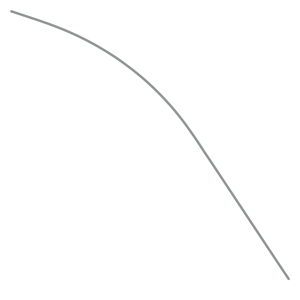

In [255]:
data['geometry'][0].buffer(0.5)

In [197]:
x

[29513.376000000164,
 29513.618400000036,
 29519.963700000197,
 29526.55159999989,
 29533.645200000145,
 29539.387000000104,
 29547.44529999979,
 29558.006099999882,
 29565.503299999982,
 29573.868499999866,
 29581.128299999982,
 29587.60599999968,
 29594.799700000323,
 29602.775200000033,
 29610.174700000323,
 29619.267699999735,
 29628.07330000028,
 29634.621299999766,
 29642.238499999978,
 29649.542200000025,
 29656.555100000463,
 29662.803600000218,
 29670.16270000022,
 29677.202300000004,
 29684.09800000023,
 29690.772300000302,
 29698.424899999984,
 29706.466099999845,
 29713.4319000002,
 29719.129399999976,
 29726.46750000026,
 29732.73110000044,
 29740.00499999989,
 29746.059200000018,
 29753.183199999854,
 29759.88800000027,
 29766.117700000294,
 29776.75800000038,
 29783.669999999925,
 29789.51620000042,
 29794.489900000393,
 29801.778099999763,
 29807.707999999635,
 29813.792799999937,
 29820.645600000396,
 29827.19830000028,
 29834.07330000028,
 29841.178399999626,
 29847.3

In [227]:
import math

class SVY21:
    # Ref: http://www.linz.govt.nz/geodetic/conversion-coordinates/projection-conversions/transverse-mercator-preliminary-computations/index.aspx
    
    # WGS84 Datum
    a = 6378137
    f = 1 / 298.257223563

    # SVY21 Projection
    # Fundamental point: Base 7 at Pierce Resevoir.
    # Latitude: 1 22 02.9154 N, longitude: 103 49 31.9752 E (of Greenwich).

    # Known Issue: Setting (oLat, oLon) to the exact coordinates specified above
    # results in computation being slightly off. The values below give the most 
    # accurate represenation of test data.
    oLat = 1.366666     # origin's lat in degrees
    oLon = 103.833333   # origin's lon in degrees
    oN = 38744.572      # false Northing
    oE = 28001.642      # false Easting
    k = 1               # scale factor

    def __init__(self):
        self.b = self.a * (1 - self.f)
        self.e2 = (2 * self.f) - (self.f * self.f)
        self.e4 = self.e2 * self.e2
        self.e6 = self.e4 * self.e2
        self.A0 = 1 - (self.e2 / 4) - (3 * self.e4 / 64) - (5 * self.e6 / 256);
        self.A2 = (3. / 8.) * (self.e2 + (self.e4 / 4) + (15 * self.e6 / 128));
        self.A4 = (15. / 256.) * (self.e4 + (3 * self.e6 / 4));
        self.A6 = 35 * self.e6 / 3072;

    def computeSVY21(self, lat, lon):
        """
        Returns a pair (N, E) representing Northings and Eastings in SVY21.
        """

        latR = lat * math.pi / 180
        sinLat = math.sin(latR)
        sin2Lat = sinLat * sinLat
        cosLat = math.cos(latR)
        cos2Lat = cosLat * cosLat
        cos3Lat = cos2Lat * cosLat
        cos4Lat = cos3Lat * cosLat
        cos5Lat = cos4Lat * cosLat
        cos6Lat = cos5Lat * cosLat
        cos7Lat = cos6Lat * cosLat

        rho = self.calcRho(sin2Lat)
        v = self.calcV(sin2Lat)
        psi = v / rho
        t = math.tan(latR)
        w = (lon - self.oLon) * math.pi / 180

        M = self.calcM(lat)
        Mo = self.calcM(self.oLat)

        w2 = w * w
        w4 = w2 * w2
        w6 = w4 * w2
        w8 = w6 * w2

        psi2 = psi * psi
        psi3 = psi2 * psi
        psi4 = psi3 * psi

        t2 = t * t
        t4 = t2 * t2
        t6 = t4 * t2

        # Compute Northing
        nTerm1 = w2 / 2 * v * sinLat * cosLat
        nTerm2 = w4 / 24 * v * sinLat * cos3Lat * (4 * psi2 + psi - t2)
        nTerm3 = w6 / 720 * v * sinLat * cos5Lat * ((8 * psi4) * (11 - 24 * t2) - (28 * psi3) * (1 - 6 * t2) + psi2 * (1 - 32 * t2) - psi * 2 * t2 + t4)
        nTerm4 = w8 / 40320 * v * sinLat * cos7Lat * (1385 - 3111 * t2 + 543 * t4 - t6)
        N = self.oN + self.k * (M - Mo + nTerm1 + nTerm2 + nTerm3 + nTerm4)

        # Compute Easting
        eTerm1 = w2 / 6 * cos2Lat * (psi - t2)
        eTerm2 = w4 / 120 * cos4Lat * ((4 * psi3) * (1 - 6 * t2) + psi2 * (1 + 8 * t2) - psi * 2 * t2 + t4)
        eTerm3 = w6 / 5040 * cos6Lat * (61 - 479 * t2 + 179 * t4 - t6)
        E = self.oE + self.k * v * w * cosLat * (1 + eTerm1 + eTerm2 + eTerm3)

        return (N, E)

    def calcM(self, lat):
        latR = lat * math.pi / 180
        return self.a * ((self.A0 * latR) - (self.A2 * math.sin(2 * latR)) + (self.A4 * math.sin(4 * latR)) - (self.A6 * math.sin(6 * latR)))

    def calcRho(self, sin2Lat):
        num = self.a * (1 - self.e2)
        denom = math.pow(1 - self.e2 * sin2Lat, 3. / 2.)
        return num / denom

    def calcV(self, sin2Lat):
        poly = 1 - self.e2 * sin2Lat
        return self.a / math.sqrt(poly)

    def computeLatLon(self, N, E):
        """
        Returns a pair (lat, lon) representing Latitude and Longitude.
        """

        Nprime = N - self.oN
        Mo = self.calcM(self.oLat)
        Mprime = Mo + (Nprime / self.k)
        n = (self.a - self.b) / (self.a + self.b)
        n2 = n * n
        n3 = n2 * n
        n4 = n2 * n2
        G = self.a * (1 - n) * (1 - n2) * (1 + (9 * n2 / 4) + (225 * n4 / 64)) * (math.pi / 180)
        sigma = (Mprime * math.pi) / (180. * G)
        
        latPrimeT1 = ((3 * n / 2) - (27 * n3 / 32)) * math.sin(2 * sigma)
        latPrimeT2 = ((21 * n2 / 16) - (55 * n4 / 32)) * math.sin(4 * sigma)
        latPrimeT3 = (151 * n3 / 96) * math.sin(6 * sigma)
        latPrimeT4 = (1097 * n4 / 512) * math.sin(8 * sigma)
        latPrime = sigma + latPrimeT1 + latPrimeT2 + latPrimeT3 + latPrimeT4

        sinLatPrime = math.sin(latPrime)
        sin2LatPrime = sinLatPrime * sinLatPrime

        rhoPrime = self.calcRho(sin2LatPrime)
        vPrime = self.calcV(sin2LatPrime)
        psiPrime = vPrime / rhoPrime
        psiPrime2 = psiPrime * psiPrime
        psiPrime3 = psiPrime2 * psiPrime
        psiPrime4 = psiPrime3 * psiPrime
        tPrime = math.tan(latPrime)
        tPrime2 = tPrime * tPrime
        tPrime4 = tPrime2 * tPrime2
        tPrime6 = tPrime4 * tPrime2
        Eprime = E - self.oE
        x = Eprime / (self.k * vPrime)
        x2 = x * x
        x3 = x2 * x
        x5 = x3 * x2
        x7 = x5 * x2

        # Compute Latitude
        latFactor = tPrime / (self.k * rhoPrime)
        latTerm1 = latFactor * ((Eprime * x) / 2)
        latTerm2 = latFactor * ((Eprime * x3) / 24) * ((-4 * psiPrime2) + (9 * psiPrime) * (1 - tPrime2) + (12 * tPrime2))
        latTerm3 = latFactor * ((Eprime * x5) / 720) * ((8 * psiPrime4) * (11 - 24 * tPrime2) - (12 * psiPrime3) * (21 - 71 * tPrime2) + (15 * psiPrime2) * (15 - 98 * tPrime2 + 15 * tPrime4) + (180 * psiPrime) * (5 * tPrime2 - 3 * tPrime4) + 360 * tPrime4)
        latTerm4 = latFactor * ((Eprime * x7) / 40320) * (1385 - 3633 * tPrime2 + 4095 * tPrime4 + 1575 * tPrime6)
        lat = latPrime - latTerm1 + latTerm2 - latTerm3 + latTerm4

        # Compute Longitude
        secLatPrime = 1. / math.cos(lat)
        lonTerm1 = x * secLatPrime
        lonTerm2 = ((x3 * secLatPrime) / 6) * (psiPrime + 2 * tPrime2)
        lonTerm3 = ((x5 * secLatPrime) / 120) * ((-4 * psiPrime3) * (1 - 6 * tPrime2) + psiPrime2 * (9 - 68 * tPrime2) + 72 * psiPrime * tPrime2 + 24 * tPrime4)
        lonTerm4 = ((x7 * secLatPrime) / 5040) * (61 + 662 * tPrime2 + 1320 * tPrime4 + 720 * tPrime6)
        lon = (self.oLon * math.pi / 180) + lonTerm1 - lonTerm2 + lonTerm3 - lonTerm4

        return (lat / (math.pi / 180), lon / (math.pi / 180))

In [240]:
calc = SVY21()

lat, lon = calc.computeLatLon(31211.44889999926,29513.376000000164)


print(lat,lon)
# SVY/21/.

1.2985390673674464 103.84691660254427


In [234]:
x[0]

29513.376000000164

In [237]:
x_lat[0]

103.8520984049067

In [238]:
y[0]

31211.44889999926

In [239]:
y_lon[0]

1.293508360354313

In [225]:
from pyproj import Proj, transform

# inProj = Proj(init='epsg:3857')
# outProj = Proj(init='epsg:4326')

inProj  = Proj("+init=EPSG:32626")
outProj = Proj("+init=EPSG:4326")

x2,y2 = transform(inProj, outProj, x[0],y[0])

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)
/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


In [226]:
print(x2,y2)

-31.224337141706112 0.28160743422098955


In [198]:
x[0]

29513.376000000164

In [228]:
y[0]

31211.44889999926

In [168]:
x_lat = [i for i in df['geometry'][0][0].xy[0]]
y_lon = [i for i in df['geometry'][0][0].xy[1]]

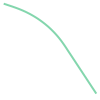

In [179]:
df['geometry'][0]

In [175]:
for i in range(len(x)):
    print(x[i]/x_lat[i])

284.18661205025535
284.1889580518214
284.25011342038266
284.31372114461976
284.38216265659946
284.43756271270064
284.5153108982957
284.6171026709633
284.6894110821574
284.77014078005897
284.84274936018215
284.90517705584415
284.97454049632023
285.0514676828252
285.122842430705
285.2105488109623
285.2955014849122
285.3586841986691
285.4321809178281
285.50264387261257
285.570319203252
285.6306128972545
285.7016049032925
285.76955987923964
285.8361082450916
285.90050449209326
285.9743383729767
286.05189895954567
286.1191264051391
286.1741651870322
286.244996163459
286.30547255398665
286.3756849392095
286.43413349963606
286.50287972697
286.5676230911559
286.6277342424915
286.7303382271663
286.79706770026576
286.85362683192136
286.9016749659924
286.97202209916594
287.02930015875677
287.0880433047652
287.1542121766916
287.21746624720623
287.2838506463745
287.35241006325634
287.4116307217321
287.46227336418326
287.51886220073266
287.56871121478906
287.62645518194705
287.69239455455397
287.742

In [17]:
def linestring_to_points(feature,line):
    return {feature:line.coords}

gdf['points'] = gdf.apply(lambda l: linestring_to_points(l['xs_ID],l['geometry']),axis=1)

0       LINESTRING (29513.376 31211.449, 29513.618 312...
1       LINESTRING (29508.584 31196.830, 29508.817 311...
2       LINESTRING (28744.000 31388.314, 28820.801 313...
3       LINESTRING (28740.927 31374.606, 28809.279 313...
4       LINESTRING (27871.646 31719.024, 27871.921 317...
                              ...                        
1394    LINESTRING (28166.957 41773.089, 28166.118 417...
1395    LINESTRING (28163.310 41770.304, 28162.141 417...
1396    LINESTRING (32212.536 29769.499, 32235.719 297...
1397    LINESTRING (39638.135 35484.169, 39632.161 354...
1398    LINESTRING (39647.329 35474.779, 39641.513 354...
Name: geometry, Length: 1399, dtype: geometry

In [58]:
data['GRND_LEVEL']

0       UNDERGROUND
1       UNDERGROUND
2       UNDERGROUND
3       UNDERGROUND
4       UNDERGROUND
           ...     
1394    ABOVEGROUND
1395    ABOVEGROUND
1396    UNDERGROUND
1397    UNDERGROUND
1398    UNDERGROUND
Name: GRND_LEVEL, Length: 1399, dtype: object

In [67]:
df['Name'] ==  data['GRND_LEVEL'][:1397]

0        True
1        True
2        True
3        True
4        True
        ...  
1392    False
1393    False
1394    False
1395    False
1396     True
Length: 1397, dtype: bool

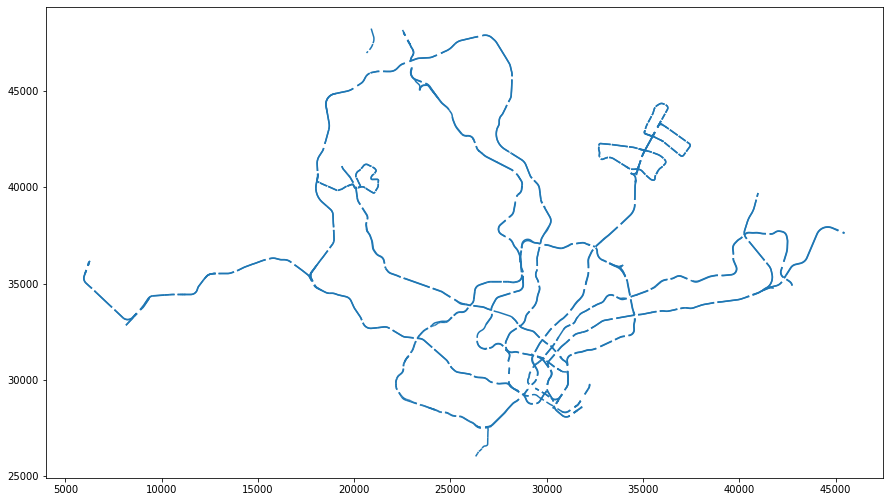

In [26]:
# plt.figure(figsize=(15,15))
data.plot(figsize=(15,15))

plt.show()

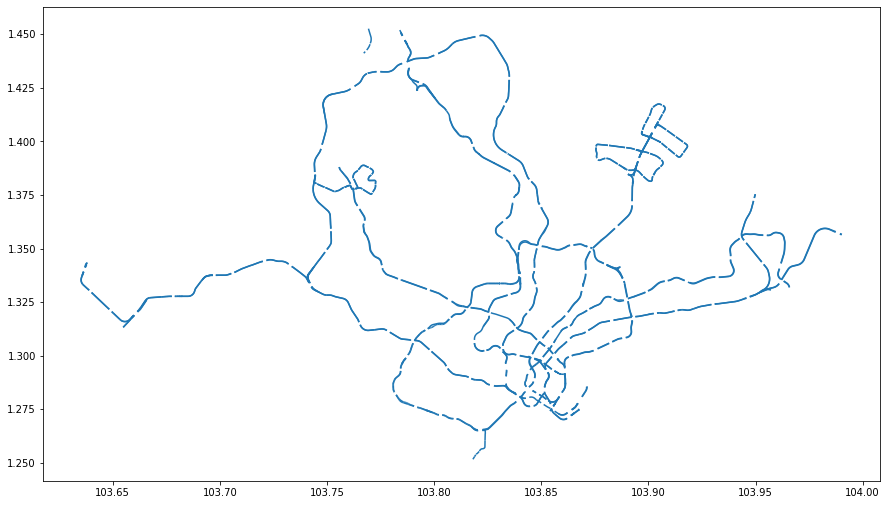

In [19]:
df.plot(figsize=(15,15))

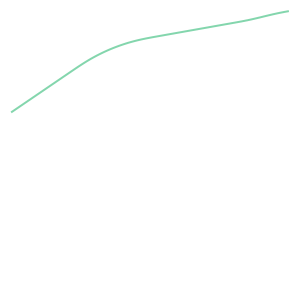

In [87]:
data['geometry'][632]

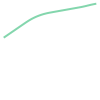

In [86]:
df['geometry'][631]

In [68]:
df['geometry'] == data['geometry'][:1397]

0       False
1       False
2       False
3       False
4       False
        ...  
1392    False
1393    False
1394    False
1395    False
1396    False
Name: geometry, Length: 1397, dtype: bool

In [ ]:
coba = data